# Sphere function
---
Description:

- Optimization (min)
- Single-objective
- Constraints (no)
---

The general equation is given by:

- $f(\mathbf{x}) = \sum_{i=1}^{M} x^2_i$, with $-\infty \le x_i \le +\infty$

and global minimum found at:

- $f(x_1, x_2, ..., x_M) = f(0, 0, ..., 0) = 0$.

## First we import python libraries and set up the directory of our code

In [1]:
import os, sys
import numpy as np
import cProfile, pstats
from math import isclose

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

## Here we import all our custom PSO code

In [2]:
from star_pso.auxiliary.swarm import Swarm
from star_pso.auxiliary.particle import Particle
from star_pso.engines.standard_pso import StandardPSO

## Define the sphere function

In [17]:
# Sphere function.
def fun_Sphere(x: np.typing.ArrayLike):
    
    # Compute the sphere function.
    f_val = np.sum(x**2)

    # Condition for termination.
    solution_found = isclose(f_val, 0.0, rel_tol=1.0e-6)
    
    # Return the solution tuple.
    return -f_val, solution_found
# _end_def_

## Here we set the PSO parameters

- Set the number of dimensions 'D'
- Set the number of particles 'N'
- Setup the initial population
- Create the PSO object

In [18]:
# Random number generator.
rng = np.random.default_rng()

# Define the number of optimizing variables.
D = 5

# Define the number of particles.
N = min(5*D, 100)

# Sample the initial points randomly.
X_t0 = rng.uniform(-100.0, +100.0, size=(N, D))

# Initial population.
swarm_t0 = Swarm([Particle(x) for x in X_t0])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm= swarm_t0,
                       obj_func= fun_Sphere,
                       x_min= -100.0, x_max= +100.0)

## Optimization process

In [19]:
PROFILE_IT = False

if PROFILE_IT:
    cProfile.run('test_PSO.run(max_it = 1000, f_tol = 1.0e-5, options = {"w": 0.5, "c1": 1.65, "c2": 1.65})',
                 'output.prof')
else:
    test_PSO.run(max_it = 300,
                 options = {"w": 0.5, "c1": 2.05, "c2": 2.05, "fipso": False},
                 reset_swarm = True, verbose = True)

Initial f_optimal = -4361.9431
Iteration:     1 -> f_optimal = -1335.5989
Iteration:    31 -> f_optimal = -12.6791
Iteration:    61 -> f_optimal = -2.5502
Iteration:    91 -> f_optimal = -0.0051
Iteration:   121 -> f_optimal = -0.0000
Iteration:   151 -> f_optimal = -0.0000
Iteration:   181 -> f_optimal = -0.0000
Iteration:   211 -> f_optimal = -0.0000
Iteration:   241 -> f_optimal = -0.0000
Iteration:   271 -> f_optimal = -0.0000
Final f_optimal = -0.0000
run: elapsed time = 0.147 seconds.


## Final output

In [20]:
# Get the optimal solution from the PSO.
i_opt, f_opt, x_opt = test_PSO.get_optimal_values()

# Display the (final) optimal value.
print(f"Optimum Found: {abs(f_opt):.6f}, at iteration {i_opt}.\n")

# Display each particle position value.
for i, xi in enumerate(x_opt, start=1):
    print(f"x{i} = {xi:>10.6f}")
# _end_for_

Optimum Found: 0.000000, at iteration 293.

x1 =   0.000000
x2 =  -0.000000
x3 =  -0.000000
x4 =   0.000000
x5 =   0.000000


In [21]:
if PROFILE_IT:
    p = pstats.Stats('output.prof')
    p.sort_stats('cumtime').print_stats(20)

### End of file

In [2]:
import matplotlib.pyplot as plt

In [80]:
def random_points_in_circle(r, num_points):
    points = []
    
    while len(points) < num_points:
        x = np.random.uniform(-r, r)
        y = np.random.uniform(-r, r)
        
        if x**2 + y**2 <= (r/1)**2:
            points.append((x, y))
    # _end_while_

    return np.array(points)

In [89]:
def nb_median_euclidean_distance(x_pos: np.ndarray,
                                 normal: bool = False) -> float:
    # Collect all the distances.
    total_dist = []

    # Scan the positions array.
    for i, p in enumerate(x_pos):
        total_dist.extend(np.sqrt(np.sum((p - x_pos[i + 1:]) ** 2, axis=1)))
    # _end_for_

    # Convert to array.
    x_dist = np.array(total_dist)

    # Find the maximum distance.
    d_max = x_dist.max()
    
    # Normalize the distances with d_max.
    if normal and d_max != 0.0:
        x_dist /= d_max
    # _end_if_
    
    # Return the median value.
    return x_dist

In [90]:
# Example usage:
radius = 6
num_samples = 250
random_points = random_points_in_circle(radius, num_samples)

In [91]:
x_dist = nb_median_euclidean_distance(random_points)

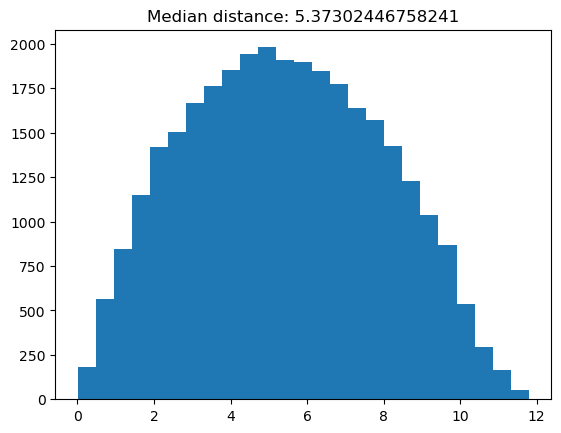

In [92]:
plt.hist(x_dist, bins=25)
plt.title(f"Median distance: {np.median(x_dist)}");

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


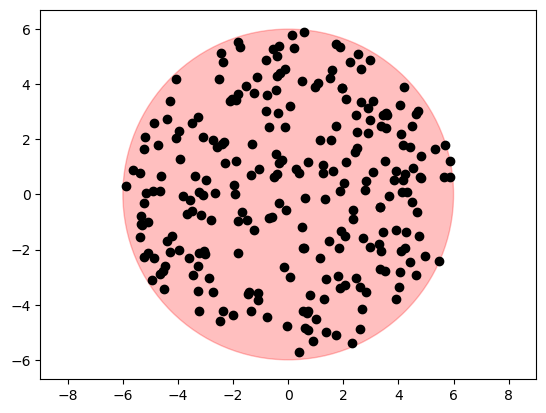

In [93]:
circle0 = plt.Circle((0, 0),
                     radius,
                     color='red', alpha=0.25)

plt.plot(random_points[:, 0],
         random_points[:, 1],
         'ok')

plt.axis('equal')

plt.xlim([-1.5*radius, 1.5*radius])
plt.ylim([-1.5*radius, 1.5*radius])

ax = plt.gcf().gca()
ax.add_patch(circle0);